In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [2]:
wav, sr = librosa.load('0_jackson_0.wav')
print('sr: ', sr)
print('wav shape: ', wav.shape)
print('length: ', wav.shape[0]/float(sr), 'secs')

sr:  22050
wav shape:  (14190,)
length:  0.6435374149659864 secs


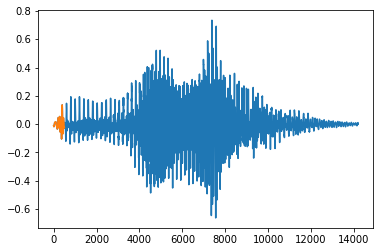

In [3]:
print(plt.plot(wav))
print(plt.plot(wav[0:500]))

In [4]:
DATA_DIR = 'C:/Users/JLK/Downloads/free-spoken-digit-dataset-master/recordings/'
#DATA_DIR = 'C:/Users/JLK/requirements/recordings/'

In [ ]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))
#STFT한 것, CNN분석하기 위해 Spectogram으로 만든 것, MF한 것, mel-spectogram한 것


for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram, 40)
        
        mel_spectogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectogram, 40)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise
        
train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))

print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_mel_spectrograms', train_mel_spectrograms.shape)
print('train_mfccs', train_mfccs.shape)
print('train_y', train_y.shape)

print('test_X', test_X.shape)
print('test_spectrograms', test_spectrograms.shape)
print('test_mel_spectrograms', test_mel_spectrograms.shape)
print('test_mfccs', test_mfccs.shape)
print('test_y', test_y.shape)

In [5]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i - a.shape[1]))))
#STFT한 것, CNN분석하기 위해 Spectogram으로 만든 것, MF한 것, mel-spectogram한 것

for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram, 40)
        
        mel_spectogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectogram, 40)
        
        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc, 40)
        
        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise
        
train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))

print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_mel_spectrograms', train_mel_spectrograms.shape)
print('train_mfccs', train_mfccs.shape)
print('train_y', train_y.shape)

print('test_X', test_X.shape)
print('test_spectrograms', test_spectrograms.shape)
print('test_mel_spectrograms', test_mel_spectrograms.shape)
print('test_mfccs', test_mfccs.shape)
print('test_y', test_y.shape)

KeyboardInterrupt: 

In [6]:
ip = Input(shape=(train_X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(10, activation='softmax')(hidden)
model = Model(ip, op)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30000)]           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3840128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,841,418
Trainable params: 3,841,418
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_X,
                   train_y,
                   epochs=10,
                   batch_size=32,
                   validation_data=(test_X, test_y))

Epoch 1/10
79/79 [==============================] - 1s 16ms/step - loss: 2.3070 - accuracy: 0.1732 - val_loss: 2.2957 - val_accuracy: 0.1380
Epoch 2/10
79/79 [==============================] - 1s 14ms/step - loss: 1.6829 - accuracy: 0.5396 - val_loss: 2.2975 - val_accuracy: 0.1540
Epoch 3/10
79/79 [==============================] - 1s 14ms/step - loss: 1.2609 - accuracy: 0.6708 - val_loss: 2.3089 - val_accuracy: 0.1560
Epoch 4/10
79/79 [==============================] - 1s 14ms/step - loss: 0.9399 - accuracy: 0.7764 - val_loss: 2.3293 - val_accuracy: 0.1560
Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 0.7320 - accuracy: 0.8368 - val_loss: 2.3367 - val_accuracy: 0.1500
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.5991 - accuracy: 0.8668 - val_loss: 2.3543 - val_accuracy: 0.1500
Epoch 7/10
79/79 [==============================] - 1s 14ms/step - loss: 0.5116 - accuracy: 0.8908 - val_loss: 2.3670 - val_accuracy: 0.1560
Epoch 8/10
79

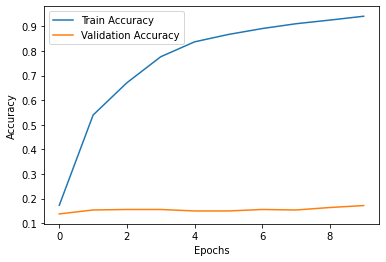

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [34]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2500, 20, 40, 1)
test X shape: (500, 20, 40, 1)


In [35]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(64, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)


m=Flatten()(m)
m=Dense(32, activation='relu')(m)
op=Dense(10, activation='softmax')(m)

model = Model(ip, op)

model.summary()


Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 20, 40, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 37, 64)        1088      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 9, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                73760     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 75,178
Trainable params: 75,178
Non-trainable params: 0
_________________________________________________

In [36]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_X_ex,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y))

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 3.0878 - accuracy: 0.0904 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 2.3028 - accuracy: 0.0880 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 2.3028 - accuracy: 0.0940 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 2.3029 - accuracy: 0.0932 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.0924 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 60/100
79/79 [==============================] - 1s 7ms/step - loss: 2.3028 - accuracy: 0.0928 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 61/100
79/79 [==============================] - 1s 7ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 62/100
79/79 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 63/100
79/79 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 64/100
79/79 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 65/100
79/79 [==============================] - 1s 6ms/step - loss: 2.3028 - accuracy: 0.0896 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

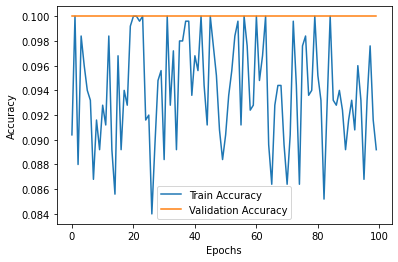

In [37]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y))

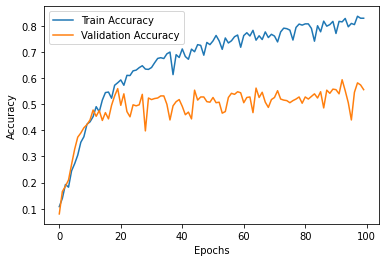

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()